# TP FINAL - EQUIDAD EN ML

### **1. Conjunto de datos**

##### **c) preprocesamiento y EDA**

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 


df = pd.concat([X, y], axis=1)


In [5]:

# metadata 
# print(statlog_german_credit_data.metadata) 
  

df

Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0          A11           6        A34        A43        1169        A65   
1          A12          48        A32        A43        5951        A61   
2          A14          12        A34        A46        2096        A61   
3          A11          42        A32        A42        7882        A61   
4          A11          24        A33        A40        4870        A61   
..         ...         ...        ...        ...         ...        ...   
995        A14          12        A32        A42        1736        A61   
996        A11          30        A32        A41        3857        A61   
997        A14          12        A32        A43         804        A61   
998        A11          45        A32        A43        1845        A61   
999        A12          45        A34        A41        4576        A62   

    Attribute7  Attribute8 Attribute9 Attribute10  ...  Attribute12  \
0          A75           4        A93        A101  ...         A121   
1          A73           2        A92        A101  ...         A121   
2          A74           2        A93        A101  ...         A121   
3          A74           2        A93        A103  ...         A122   
4          A73           3        A93        A101  ...         A124   
..         ...         ...        ...         ...  ...          ...   
995        A74           3        A92        A101  ...         A121   
996        A73           4        A91        A101  ...         A122   
997        A75           4        A93        A101  ...         A123   
998        A73           4        A93        A101  ...         A124   
999        A71           3        A93        A101  ...         A123   

    Attribute13  Attribute14 Attribute15 Attribute16  Attribute17 Attribute18  \
0            67         A143        A152           2         A173           1   
1            22         A143        A152           1         A173           1   
2            49         A143        A152           1         A172           2   
3            45         A143        A153           1         A173           2   
4            53         A143        A153           2         A173           2   
..          ...          ...         ...         ...          ...         ...   
995          31         A143        A152           1         A172           1   
996          40         A143        A152           1         A174           1   
997          38         A143        A152           1         A173           1   
998          23         A143        A153           1         A173           1   
999          27         A143        A152           1         A173           1   

     Attribute19 Attribute20 class  
0           A192        A201     1  
1           A191        A201     2  
2           A191        A201     1  
3           A191        A201     1  
4           A191        A201     2  
..           ...         ...   ...  
995         A191        A201     1  
996         A192        A201     1  
997         A191        A201     1  
998         A192        A201     2  
999         A191        A201     1  

[1000 rows x 21 columns]

In [6]:
# Diccionario de mapeos en espa√±ol
attribute_map = {
    "Attribute1": {
        "A11": "< 0 DM",
        "A12": "0 <= ... < 200 DM",
        "A13": ">= 200 DM / asignaciones salariales",
        "A14": "sin cuenta corriente",
    },
    "Attribute3": {
        "A30": "sin cr√©ditos / todos pagados",
        "A31": "todos los cr√©ditos en este banco pagados",
        "A32": "cr√©ditos existentes pagados debidamente",
        "A33": "retraso en el pago",
        "A34": "cuenta cr√≠tica / otros cr√©ditos",
    },
    "Attribute4": {
        "A40": "coche (nuevo)",
        "A41": "coche (usado)",
        "A42": "muebles/equipos",
        "A43": "radio/televisi√≥n",
        "A44": "electrodom√©sticos",
        "A45": "reparaciones",
        "A46": "educaci√≥n",
        "A47": "vacaciones (?)",
        "A48": "reentrenamiento",
        "A49": "negocios",
        "A410": "otros",
    },
    "Attribute6": {
        "A61": "< 100 DM",
        "A62": "100 <= ... < 500 DM",
        "A63": "500 <= ... < 1000 DM",
        "A64": ">= 1000 DM",
        "A65": "desconocido / sin ahorros",
    },
    "Attribute7": {
        "A71": "desempleado",
        "A72": "< 1 a√±o",
        "A73": "1 <= ... < 4 a√±os",
        "A74": "4 <= ... < 7 a√±os",
        "A75": ">= 7 a√±os",
    },
    "Attribute9": {
        "A91": "hombre: divorciado/separado",
        "A92": "mujer: divorciada/separada/casada",
        "A93": "hombre: soltero",
        "A94": "hombre: casado/viudo",
        "A95": "mujer: soltera",
    },
    "Attribute10": {
        "A101": "ninguno",
        "A102": "co-solicitante",
        "A103": "garante",
    },
    "Attribute12": {
        "A121": "bienes ra√≠ces",
        "A122": "sociedad de construcci√≥n / seguro",
        "A123": "coche u otro",
        "A124": "desconocido / sin propiedad",
    },
    "Attribute14": {
        "A141": "banco",
        "A142": "tiendas",
        "A143": "ninguno",
    },
    "Attribute15": {
        "A151": "alquiler",
        "A152": "propio",
        "A153": "gratis",
    },
    "Attribute17": {
        "A171": "desempleado / no calificado - no residente",
        "A172": "no calificado - residente",
        "A173": "empleado calificado / oficial",
        "A174": "gesti√≥n / aut√≥nomo / altamente calificado",
    },
    "Attribute19": {
        "A191": "sin tel√©fono",
        "A192": "s√≠, registrado a nombre",
    },
    "Attribute20": {
        "A201": "s√≠ (trabajador extranjero)",
        "A202": "no (no trabajador extranjero)",
    },
}


for attr, mapping in attribute_map.items():
    df[attr] = df[attr].map(mapping)


In [7]:
df.rename(columns={
    'Attribute1': 'cuenta_corriente',
    'Attribute2': 'duracion_credito_meses',
    'Attribute3': 'historial_crediticio',
    'Attribute4': 'proposito_credito',
    'Attribute5': 'monto_credito',
    'Attribute6': 'cuenta_ahorros',
    'Attribute7': 'antiguedad_empleo',
    'Attribute8': 'tasa_cuota_ingreso',
    'Attribute9': 'estado_civil_genero',
    'Attribute10': 'otros_deudores',
    'Attribute11': 'residencia_actual_anios',
    'Attribute12': 'propiedad',
    'Attribute13': 'edad',
    'Attribute14': 'otros_planes_pago',
    'Attribute15': 'tipo_vivienda',
    'Attribute16': 'cantidad_creditos_existentes',
    'Attribute17': 'ocupacion',
    'Attribute18': 'personas_a_cargo',
    'Attribute19': 'tiene_telefono',
    'Attribute20': 'trabajador_extranjero',
    'class': 'clase_pred'
}, inplace=True)


In [8]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


df['estado_civil_genero'].unique()


Summary Statistics:
            cuenta_corriente  duracion_credito_meses  \
count                   1000             1000.000000   
unique                     4                     NaN   
top     sin cuenta corriente                     NaN   
freq                     394                     NaN   
mean                     NaN               20.903000   
std                      NaN               12.058814   
min                      NaN                4.000000   
25%                      NaN               12.000000   
50%                      NaN               18.000000   
75%                      NaN               24.000000   
max                      NaN               72.000000   

                           historial_crediticio proposito_credito  \
count                                      1000              1000   
unique                                        5                10   
top     cr√©ditos existentes pagados debidamente  radio/televisi√≥n   
freq                        

array(['hombre: soltero', 'mujer: divorciada/separada/casada',
       'hombre: divorciado/separado', 'hombre: casado/viudo'],
      dtype=object)

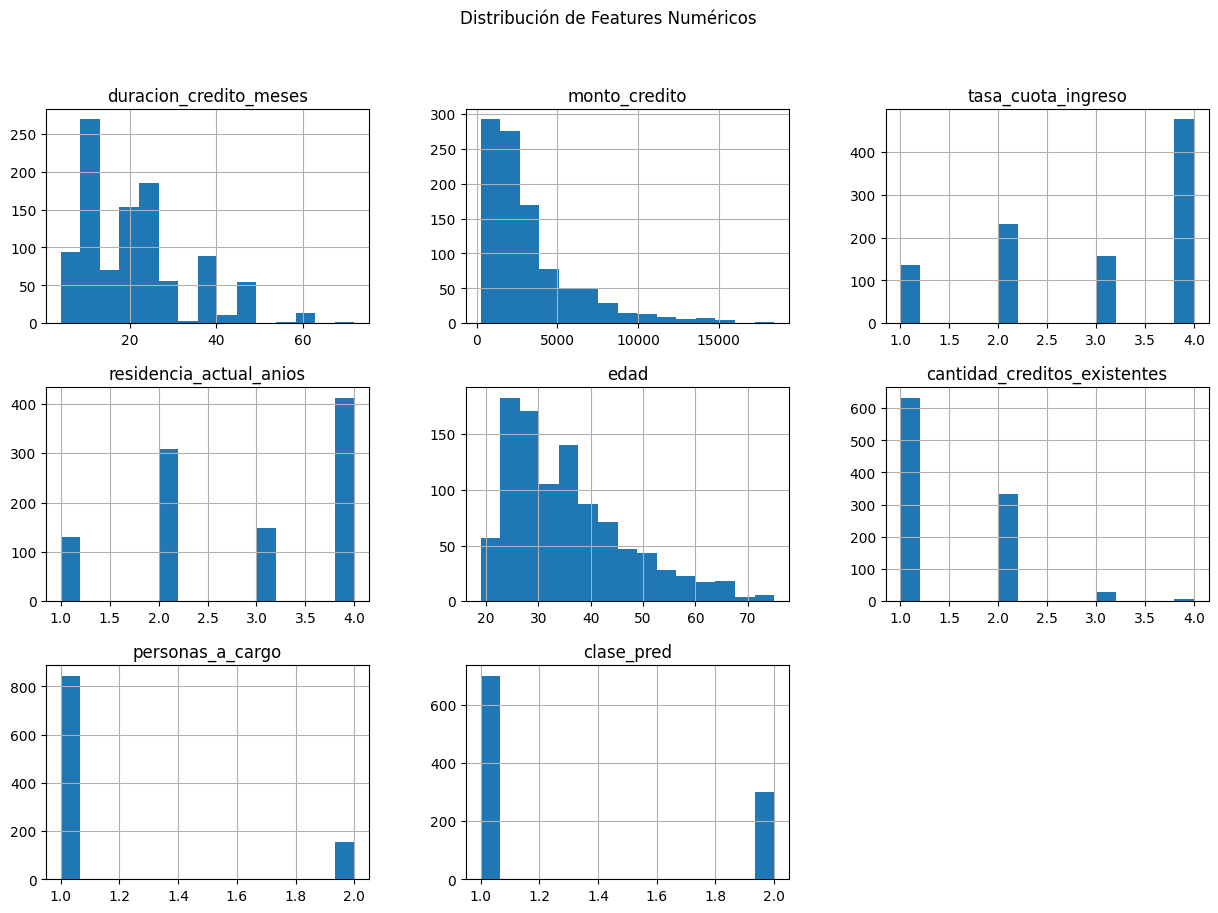

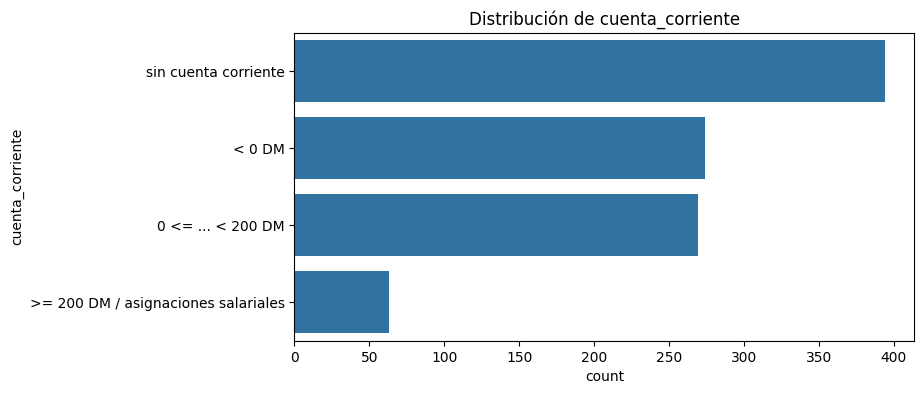

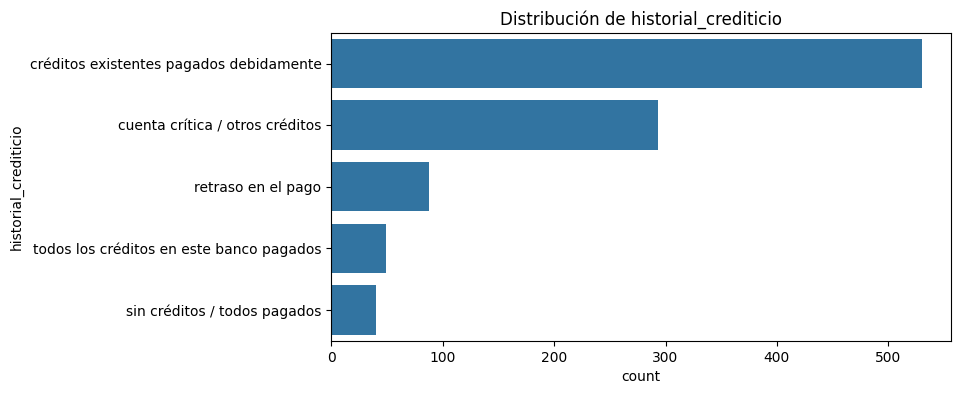

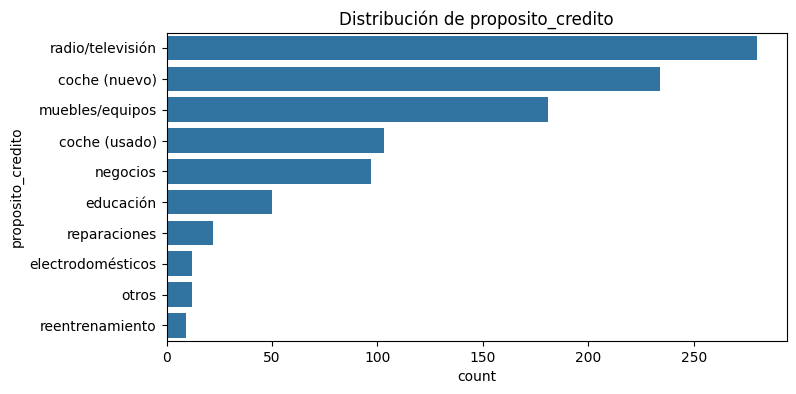

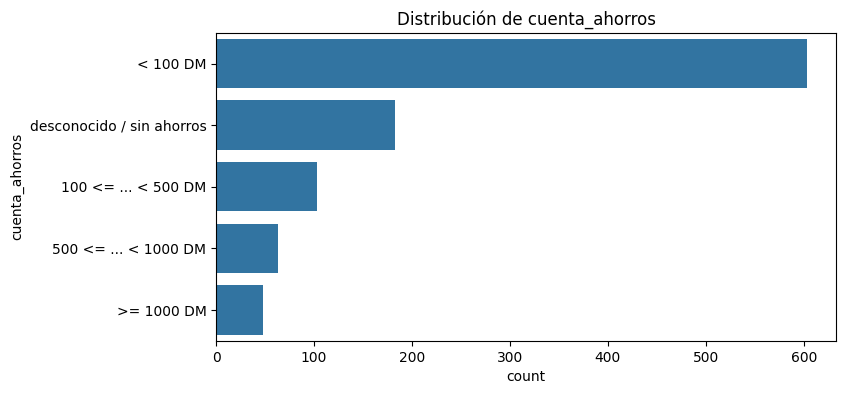

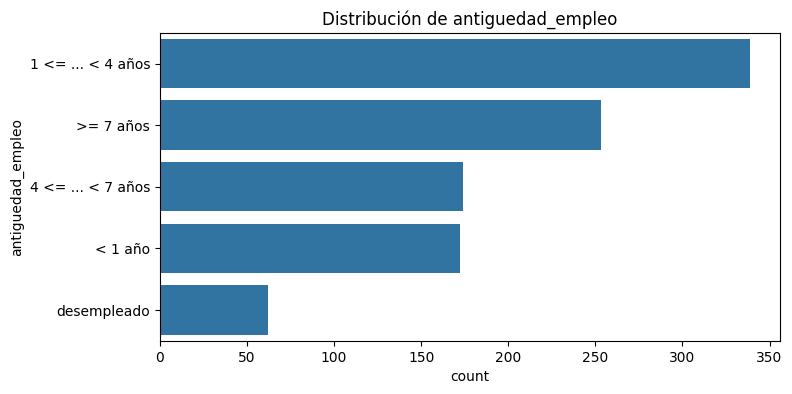

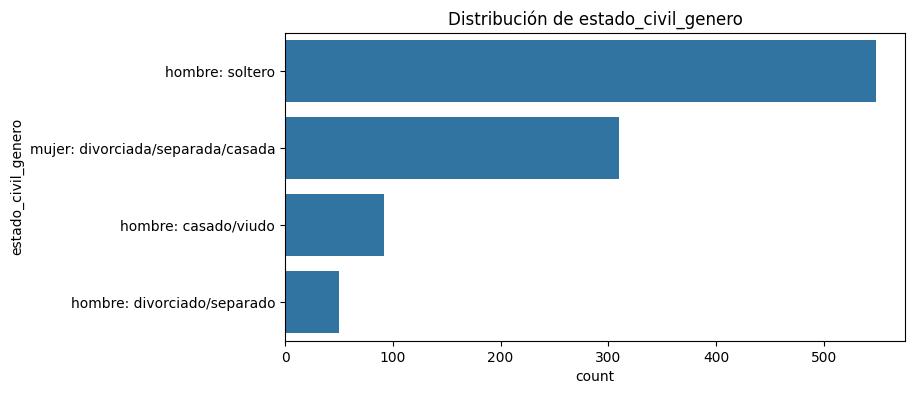

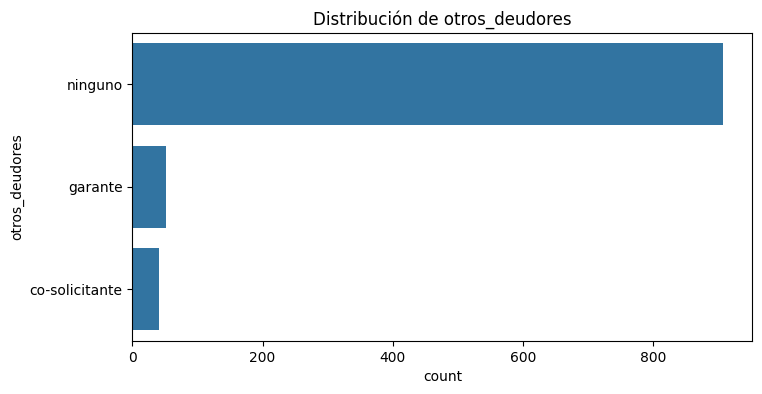

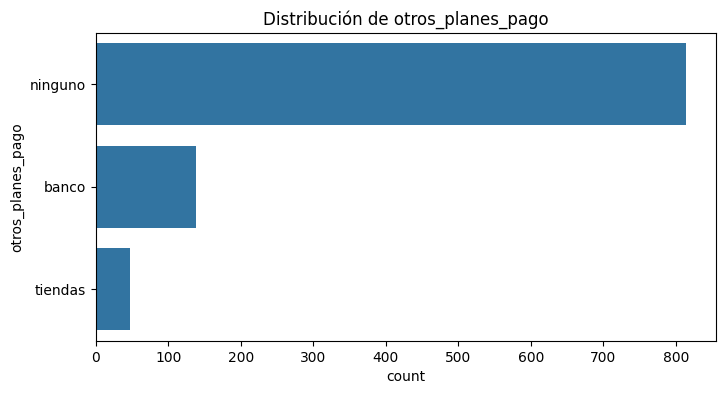

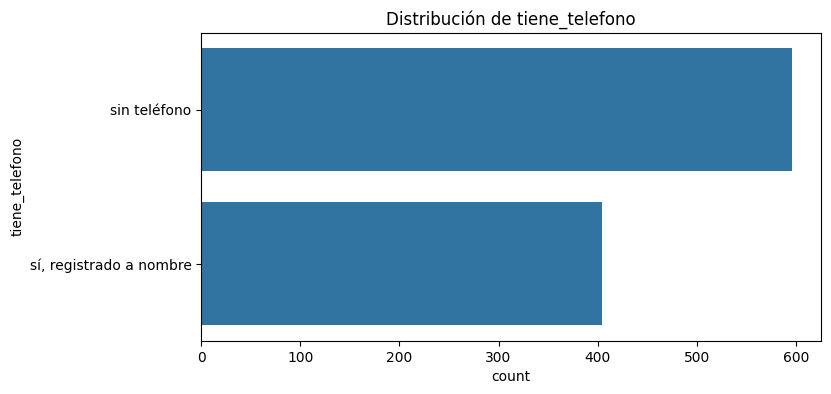

In [9]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribuci√≥n de Features Num√©ricos')
plt.show()

# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribuci√≥n de {col}')
    plt.show()

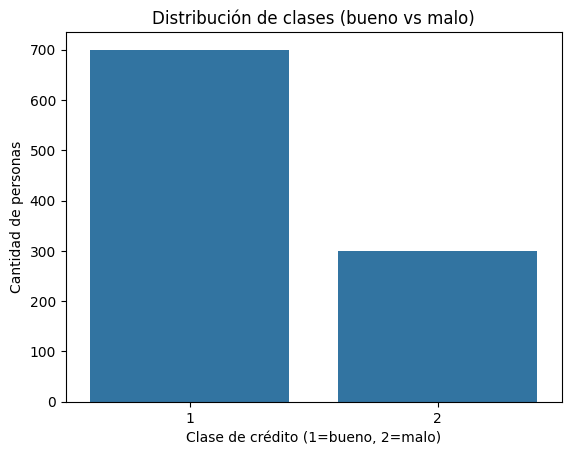

clase_pred
1    70.0
2    30.0
Name: proportion, dtype: float64


In [10]:
# Conteo de clases
sns.countplot(x='clase_pred', data=df)
plt.title("Distribuci√≥n de clases (bueno vs malo)")
plt.xlabel("Clase de cr√©dito (1=bueno, 2=malo)")
plt.ylabel("Cantidad de personas")
plt.show()

# Porcentaje por clase
print(df['clase_pred'].value_counts(normalize=True) * 100)


In [11]:
df['genero'] = df['estado_civil_genero'].apply(lambda x: 'femenino' if x.startswith('mujer') else 'masculino')
df[['genero', 'estado_civil']] = df['estado_civil_genero'].str.split(': ', expand=True)
df['genero'] = df['genero'].map({'mujer': 'femenino', 'hombre': 'masculino'})


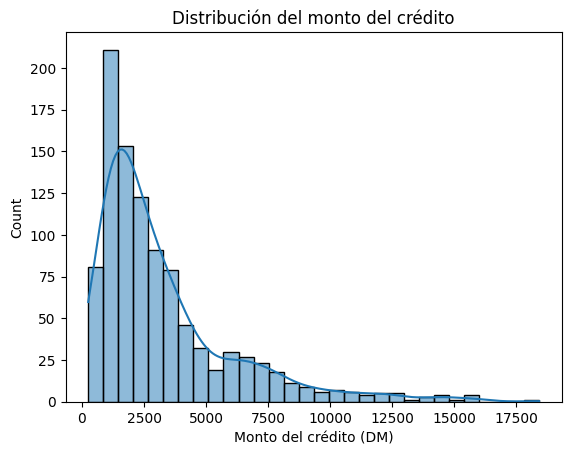

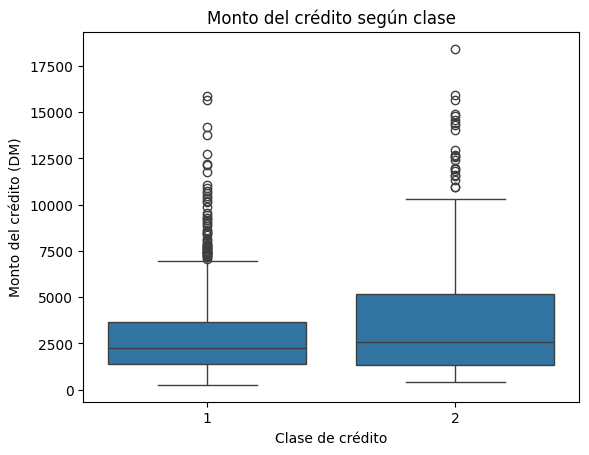

In [12]:
# Histograma
sns.histplot(df['monto_credito'], bins=30, kde=True)
plt.title("Distribuci√≥n del monto del cr√©dito")
plt.xlabel("Monto del cr√©dito (DM)")
plt.show()

# Boxplot por clase
sns.boxplot(x='clase_pred', y='monto_credito', data=df)
plt.title("Monto del cr√©dito seg√∫n clase")
plt.xlabel("Clase de cr√©dito")
plt.ylabel("Monto del cr√©dito (DM)")
plt.show()


üîç Informaci√≥n general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   cuenta_corriente              1000 non-null   object
 1   duracion_credito_meses        1000 non-null   int64 
 2   historial_crediticio          1000 non-null   object
 3   proposito_credito             1000 non-null   object
 4   monto_credito                 1000 non-null   int64 
 5   cuenta_ahorros                1000 non-null   object
 6   antiguedad_empleo             1000 non-null   object
 7   tasa_cuota_ingreso            1000 non-null   int64 
 8   estado_civil_genero           1000 non-null   object
 9   otros_deudores                1000 non-null   object
 10  residencia_actual_anios       1000 non-null   int64 
 11  propiedad                     1000 non-null   object
 12  edad                          1000 non

None


üìä Estad√≠sticas generales:


duracion_credito_meses  monto_credito  tasa_cuota_ingreso  \
count             1000.000000    1000.000000         1000.000000   
mean                20.903000    3271.258000            2.973000   
std                 12.058814    2822.736876            1.118715   
min                  4.000000     250.000000            1.000000   
25%                 12.000000    1365.500000            2.000000   
50%                 18.000000    2319.500000            3.000000   
75%                 24.000000    3972.250000            4.000000   
max                 72.000000   18424.000000            4.000000   

       residencia_actual_anios         edad  cantidad_creditos_existentes  \
count              1000.000000  1000.000000                   1000.000000   
mean                  2.845000    35.546000                      1.407000   
std                   1.103718    11.375469                      0.577654   
min                   1.000000    19.000000                      1.000000   
25%                   2.000000    27.000000                      1.000000   
50%                   3.000000    33.000000                      1.000000   
75%                   4.000000    42.000000                      2.000000   
max                   4.000000    75.000000                      4.000000   

       personas_a_cargo   clase_pred  
count       1000.000000  1000.000000  
mean           1.155000     1.300000  
std            0.362086     0.458487  
min            1.000000     1.000000  
25%            1.000000     1.000000  
50%            1.000000     1.000000  
75%            1.000000     2.000000  
max            2.000000     2.000000


üéØ Distribuci√≥n de la variable objetivo (clase_pred):
clase_pred
1    0.7
2    0.3
Name: proportion, dtype: float64


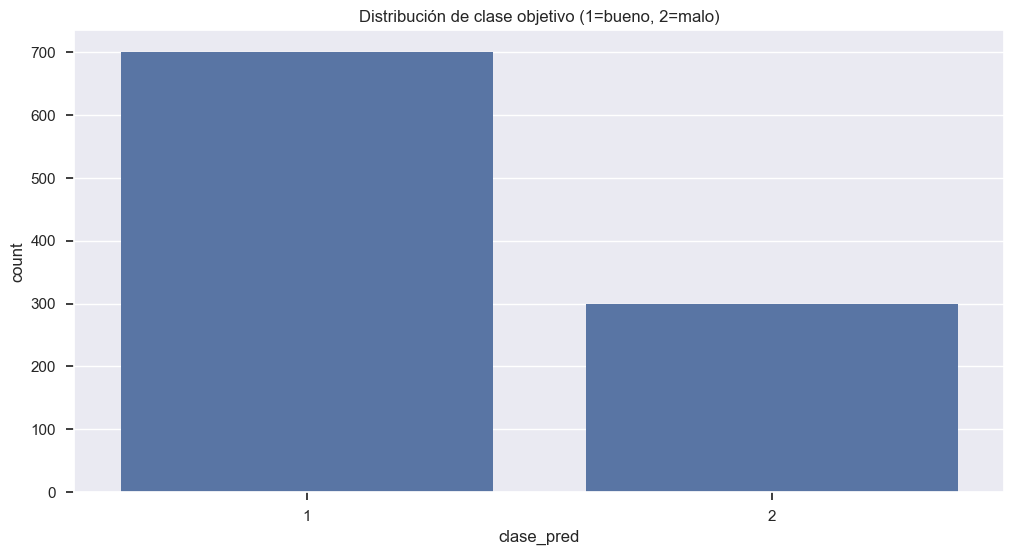

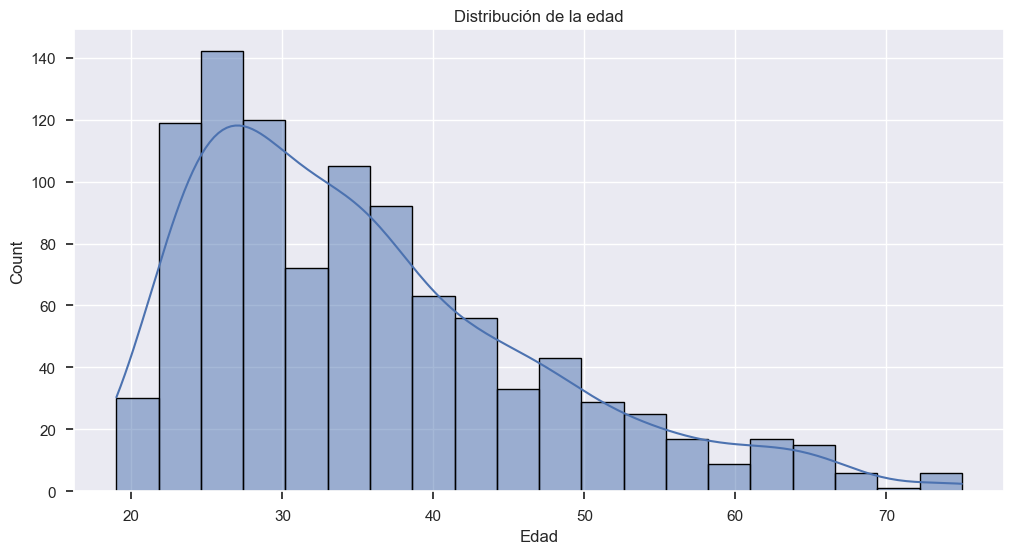

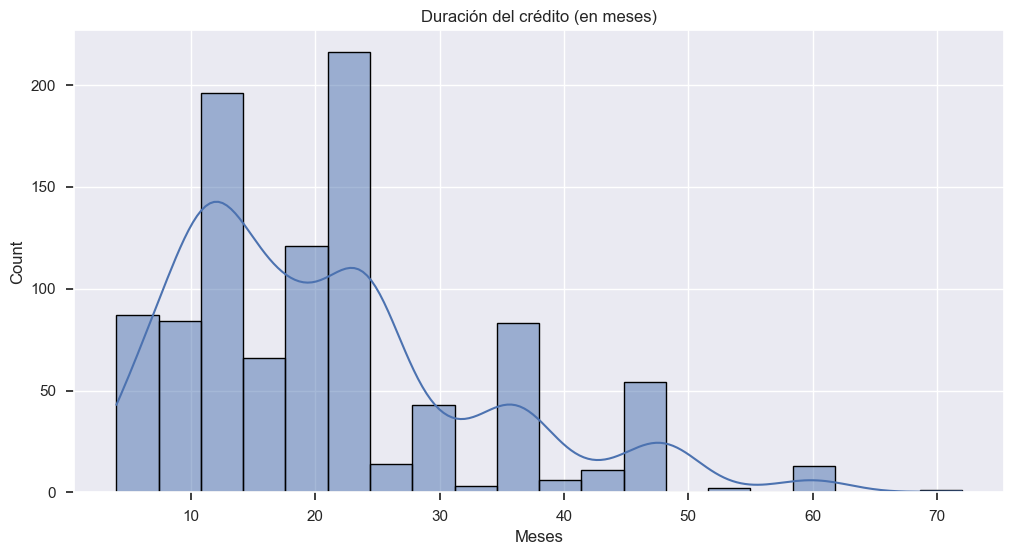


‚öñÔ∏è Distribuci√≥n por g√©nero:
genero
masculino    0.69
femenino     0.31
Name: proportion, dtype: float64


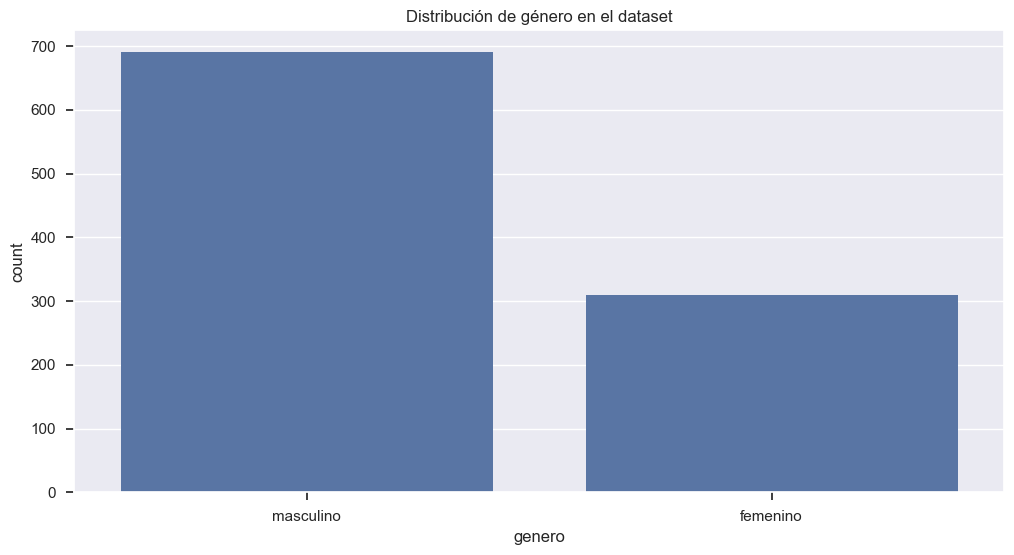


üìå Proporci√≥n de clase_pred por g√©nero:


clase_pred         1         2
genero                        
femenino    0.648387  0.351613
masculino   0.723188  0.276812

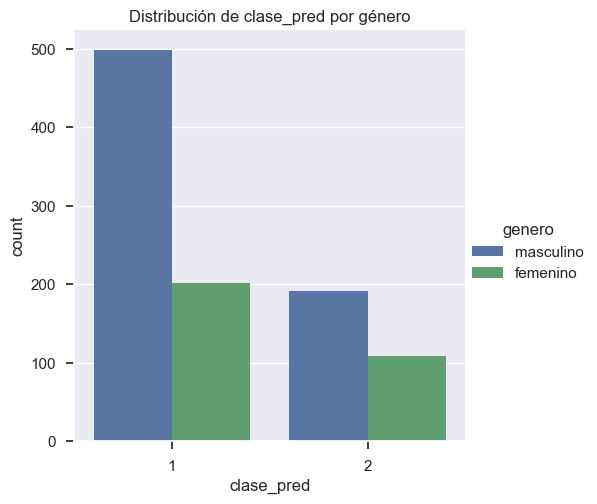

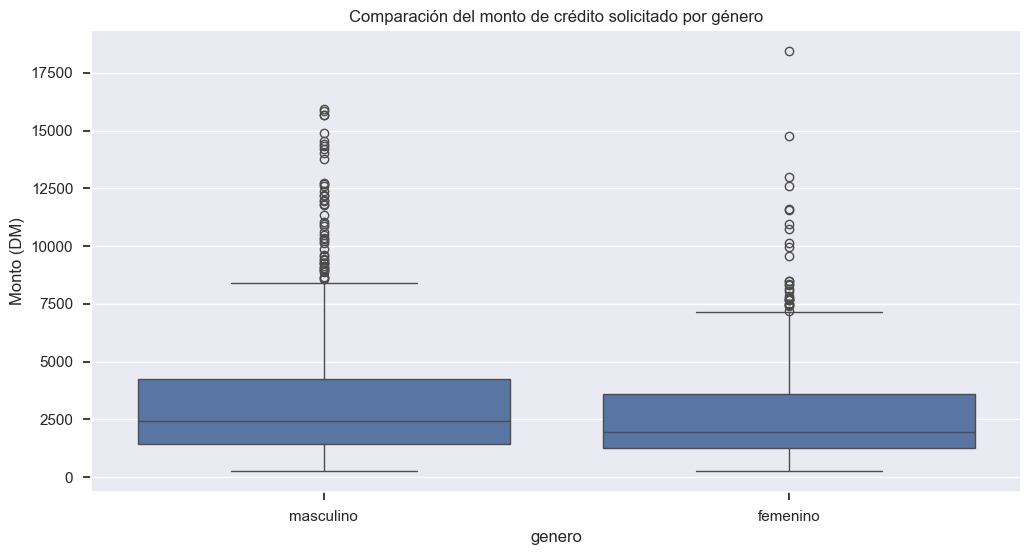

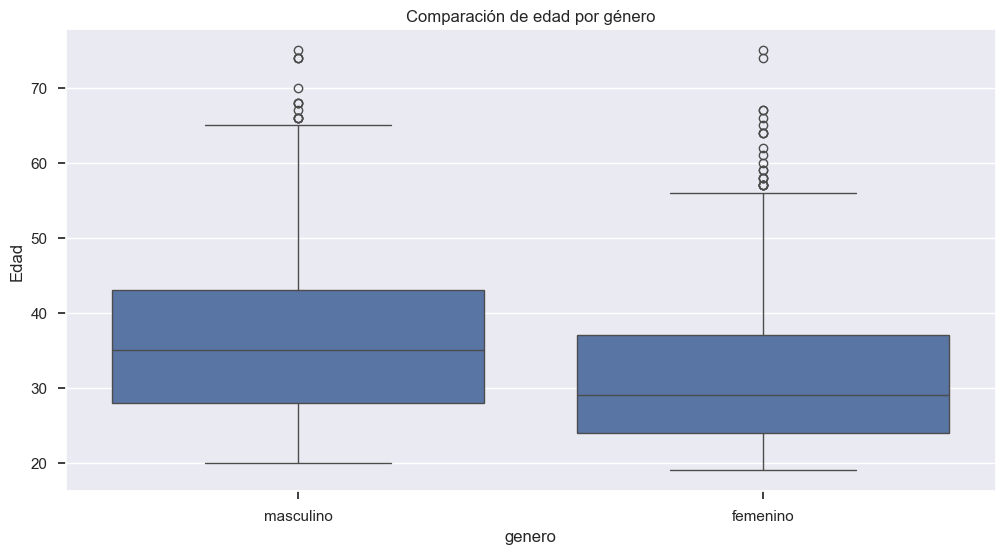

In [13]:
# Tama√±o base de los gr√°ficos
plt.style.use('seaborn-v0_8')
sns.set_context('notebook')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Info general
print("üîç Informaci√≥n general del dataset:")
display(df.info())

# 2. Estad√≠sticas b√°sicas
print("\nüìä Estad√≠sticas generales:")
display(df.describe())

# 3. Distribuci√≥n de la variable objetivo
print("\nüéØ Distribuci√≥n de la variable objetivo (clase_pred):")
print(df['clase_pred'].value_counts(normalize=True))

sns.countplot(data=df, x='clase_pred')
plt.title('Distribuci√≥n de clase objetivo (1=bueno, 2=malo)')
plt.show()

# 4. Distribuci√≥n de edades
sns.histplot(data=df, x='edad', bins=20, kde=True)
plt.title('Distribuci√≥n de la edad')
plt.xlabel('Edad')
plt.show()

# 5. Duraci√≥n del cr√©dito
sns.histplot(data=df, x='duracion_credito_meses', bins=20, kde=True)
plt.title('Duraci√≥n del cr√©dito (en meses)')
plt.xlabel('Meses')
plt.show()

# 6. Monto del cr√©dito
sns.histplot(data=df, x='monto_credito', bins=30, kde=True)
plt.title('Monto del cr√©dito solicitado')
plt.xlabel('DM')
plt.show()

# 7. Distribuci√≥n de g√©nero
print("\n‚öñÔ∏è Distribuci√≥n por g√©nero:")
print(df['genero'].value_counts(normalize=True))

sns.countplot(data=df, x='genero')
plt.title('Distribuci√≥n de g√©nero en el dataset')
plt.show()

# 8. Clase por g√©nero (SESGO)
print("\nüìå Proporci√≥n de clase_pred por g√©nero:")
display(df.groupby('genero')['clase_pred'].value_counts(normalize=True).unstack())

sns.catplot(data=df, kind='count', x='clase_pred', hue='genero')
plt.title('Distribuci√≥n de clase_pred por g√©nero')
plt.show()

# 9. Comparaci√≥n de monto solicitado seg√∫n g√©nero
sns.boxplot(data=df, x='genero', y='monto_credito')
plt.title('Comparaci√≥n del monto de cr√©dito solicitado por g√©nero')
plt.ylabel('Monto (DM)')
plt.show()

# 10. Edad media por g√©nero
sns.boxplot(data=df, x='genero', y='edad')
plt.title('Comparaci√≥n de edad por g√©nero')
plt.ylabel('Edad')
plt.show()


#### **1. d) üìå Identificaci√≥n de sesgos potenciales**

In [14]:
# Representaci√≥n total por g√©nero
print("üìä Distribuci√≥n total por g√©nero:")
display(df['genero'].value_counts(normalize=True).rename('Proporci√≥n'))

# Distribuci√≥n por g√©nero de la clase_pred = 1 (bueno)
aprobados = df[df['clase_pred'] == 1]
print("\nüìä Distribuci√≥n por g√©nero entre aprobados:")
display(aprobados['genero'].value_counts(normalize=True).rename('Proporci√≥n'))

# Comparaci√≥n lado a lado
pivot = df.groupby('genero')['clase_pred'].value_counts(normalize=True).unstack().rename(columns={1: 'bueno', 2: 'malo'})
print("\nüìä Proporci√≥n de aprobados/rechazados por g√©nero:")
display(pivot)


üìä Distribuci√≥n total por g√©nero:


genero
masculino    0.69
femenino     0.31
Name: Proporci√≥n, dtype: float64


üìä Distribuci√≥n por g√©nero entre aprobados:


genero
masculino    0.712857
femenino     0.287143
Name: Proporci√≥n, dtype: float64


üìä Proporci√≥n de aprobados/rechazados por g√©nero:


clase_pred     bueno      malo
genero                        
femenino    0.648387  0.351613
masculino   0.723188  0.276812

**Distribuci√≥n de g√©nero en el dataset:**
- Masculino: 69%

- Femenino: 31%

Esto muestra que el dataset est√° desbalanceado en t√©rminos de g√©nero, con mayor representaci√≥n masculina.

*Distribuci√≥n de aprobaciones por g√©nero (clase = 1):*

- Mujeres: 64.8%

- Hombres: 72.3%

Las mujeres tienen menor proporci√≥n de cr√©ditos aprobados que los hombres.

In [15]:
# Tasa de aprobaci√≥n por g√©nero
tasa_mujer = len(df[(df['genero'] == 'femenino') & (df['clase_pred'] == 1)]) / len(df[df['genero'] == 'femenino'])
tasa_hombre = len(df[(df['genero'] == 'masculino') & (df['clase_pred'] == 1)]) / len(df[df['genero'] == 'masculino'])

disparate_impact = tasa_mujer / tasa_hombre

print(f"üìê Disparate Impact (Mujer / Hombre): {disparate_impact:.3f}")
if disparate_impact < 0.8:
    print("üî¥ Posible sesgo: el grupo protegido recibe aprobaciones significativamente menores.")
else:
    print("üü¢ No se observa disparate impact fuerte.")


üìê Disparate Impact (Mujer / Hombre): 0.897
üü¢ No se observa disparate impact fuerte.


‚úÖ Conclusi√≥n: No se viola la "regla del 80%" (umbral = 0.8), por lo que no hay un impacto dispar fuerte, aunque el valor est√° relativamente cerca.

Este es un est√°ndar fuerte en fairness:

Si el valor cae por debajo de 0.8 (criterio del 80% rule), hay un disparate impact considerado discriminatorio.

En tu caso, est√° cerca pero a√∫n dentro de lo aceptable ‚Üí monitorizable, pero no claramente injusto.

In [16]:
aprob_mujer = df[(df['genero'] == 'femenino') & (df['clase_pred'] == 1)].shape[0] / df[df['genero'] == 'femenino'].shape[0] 
aprob_hombre = df[(df['genero'] == 'masculino') & (df['clase_pred'] == 1)].shape[0] / df[df['genero'] == 'masculino'].shape[0]

dpd = aprob_mujer - aprob_hombre
print(f"Diferencia de paridad demogr√°fica (mujer - hombre): {dpd:.3f}")

Diferencia de paridad demogr√°fica (mujer - hombre): -0.075


üìâ Las mujeres son aprobadas un 7.5% menos que los hombres en proporci√≥n dentro de su grupo.

No es un sesgo extremo, pero s√≠ es una diferencia concreta y significativa desde una perspectiva de equidad.

En un contexto bancario, si no hay justificaci√≥n t√©cnica clara (por ejemplo, variables correlacionadas con riesgo que est√©n desbalanceadas entre g√©neros), esto podr√≠a indicar una injusticia en la asignaci√≥n.

Este hallazgo complementa muy bien el Disparate Impact (0.897): est√°s justo en el borde donde puede considerarse una diferencia preocupante.

##### **Conclusi√≥n - An√°lisis de sesgos por g√©nero**
Tras realizar un an√°lisis exploratorio, se observ√≥ una distribuci√≥n desbalanceada de g√©nero en el dataset: aproximadamente el 69% de las personas son hombres y el 31% mujeres. Esta disparidad se mantiene entre los casos aprobados.

Sin embargo, al analizar las tasas de aprobaci√≥n por g√©nero, encontramos que:

- El 72.3% de los hombres reciben aprobaci√≥n.

- El 64.8% de las mujeres reciben aprobaci√≥n.

Esto se traduce en una *Demographic Parity Difference* de -0.075, indicando que las mujeres son aprobadas **7.5 puntos porcentuales menos** que los hombres en promedio. Adem√°s, el Disparate Impact calculado fue 0.897, lo que si bien no es considerado un sesgo fuerte (el umbral cr√≠tico suele ser 0.8), s√≠ alerta sobre una diferencia que podr√≠a requerir revisi√≥n m√°s profunda.

En conjunto, estos indicadores sugieren la **existencia de un posible sesgo de representaci√≥n o trato desigual por g√©nero**, el cual ser√° tenido en cuenta a la hora de construir y evaluar el modelo predictivo.

### **2. Creaci√≥n de un modelo inicial**

#### **Selecci√≥n modelo de clasificaci√≥n - Entrenamiento, evaluaci√≥n y resultados**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [18]:
df['estado_civil'].unique()

array(['soltero', 'divorciada/separada/casada', 'divorciado/separado',
       'casado/viudo'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder

ordered_columns = ['cuenta_corriente', 'cuenta_ahorros', 'antiguedad_empleo']
for col in ordered_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


# Variables sin orden inherente
# Variables sin orden inherente (incluyendo genero y estado_civil)
categorical_columns = [
    'historial_crediticio', 'proposito_credito', 'estado_civil_genero', 
    'otros_deudores', 'propiedad', 'otros_planes_pago', 'tipo_vivienda', 
    'ocupacion', 'tiene_telefono', 'trabajador_extranjero', 
    'genero', 'estado_civil'  # Nuevas columnas a√±adidas
]



df_model = pd.get_dummies(df, columns=categorical_columns, drop_first=True)



In [20]:
X = df_model.drop(columns=['clase_pred'])
y = df_model['clase_pred'].replace({1: 1, 2: 0})  # 1 es bueno, ahora pasa a ser la pred positiva, 2 es malo, ahora pasa a ser la pred negativa.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Preprocessing
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.33      0.43        60
           1       0.76      0.91      0.83       140

    accuracy                           0.74       200
   macro avg       0.69      0.62      0.63       200
weighted avg       0.72      0.74      0.71       200


Confusion Matrix:
[[ 20  40]
 [ 12 128]]


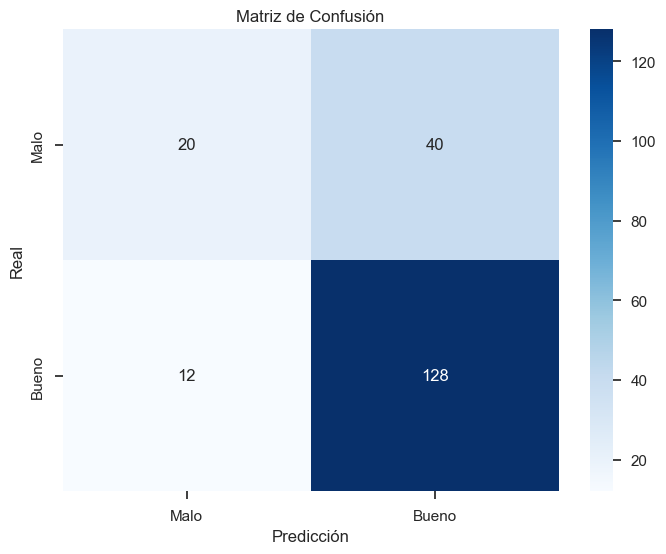

Verdaderos Negativos (TN): 20
Falsos Positivos (FP): 40
Falsos Negativos (FN): 12
Verdaderos Positivos (TP): 128


In [22]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



# Calcular la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malo', 'Bueno'], yticklabels=['Malo', 'Bueno'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")

In [23]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.6238095238095238

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score


# Definimos los hiperpar√°metros a testear
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced'],
    'max_features': ['sqrt', 'log2'],
}



precision_pagar√° = make_scorer(precision_score, pos_label=1)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring=precision_pagar√°,
    n_jobs=-1,
    verbose=1
)

# Ejecutamos
grid_search.fit(X_train, y_train)

# Mejor modelo y su evaluaci√≥n
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


üîç Mejor combinaci√≥n de hiperpar√°metros:
{'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

üìä Nuevo classification report:
              precision    recall  f1-score   support

        Malo       0.50      0.63      0.56        60
       Bueno       0.82      0.73      0.77       140

    accuracy                           0.70       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.73      0.70      0.71       200

üìâ Matriz de confusi√≥n:


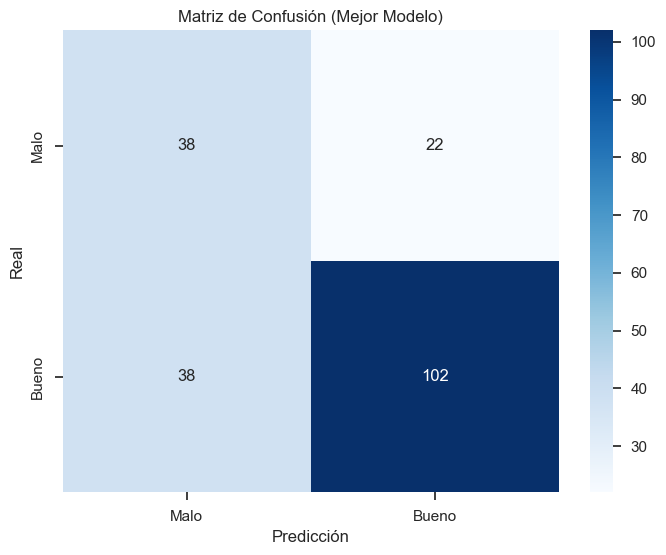

Verdaderos negativos (TN): 38
Falsos positivos (FP): 22
Falsos negativos (FN): 38
Verdaderos positivos (TP): 102


In [23]:

print("üîç Mejor combinaci√≥n de hiperpar√°metros:")
print(grid_search.best_params_)

print("\nüìä Nuevo classification report:")
print(classification_report(y_test, y_pred_best, target_names=['Malo', 'Bueno']))

print("üìâ Matriz de confusi√≥n:")
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = ['Malo', 'Bueno'], yticklabels=['Malo', 'Bueno'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n (Mejor Modelo)')
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")
print(f"Falsos negativos (FN): {fn}")
print(f"Verdaderos positivos (TP): {tp}")

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [27]:

# Entrenamos el modelo
xgb_model = XGBClassifier(
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluaci√≥n
print("üìä Classification report:")
print(classification_report(y_test, y_pred_xgb))

print("üìâ Matriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred_xgb))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()

üìä Classification report:
              precision    recall  f1-score   support

           0       0.57      0.47      0.51        60
           1       0.79      0.85      0.82       140

    accuracy                           0.73       200
   macro avg       0.68      0.66      0.67       200
weighted avg       0.72      0.73      0.73       200

üìâ Matriz de confusi√≥n:
[[ 28  32]
 [ 21 119]]


In [28]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 750, 1000],
    'max_depth': [10, 20, 30, 40],
    'class_weight': [None, 'balanced']
}

grid_search_xgb = GridSearchCV(
    xgb_model,
    param_grid,
    cv=5,
    scoring = 'precision',
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

In [30]:

print("üîç Mejor combinaci√≥n de hiperpar√°metros:")
print(grid_search_xgb.best_params_)

print("\nüìä Classification report (mejorado):")
print(classification_report(y_test, y_pred_best_xgb))


üîç Mejor combinaci√≥n de hiperpar√°metros:
{'class_weight': None, 'max_depth': 10, 'n_estimators': 1000}

üìä Classification report (mejorado):
              precision    recall  f1-score   support

           0       0.58      0.53      0.56        60
           1       0.81      0.84      0.82       140

    accuracy                           0.74       200
   macro avg       0.69      0.68      0.69       200
weighted avg       0.74      0.74      0.74       200



üìâ Matriz de confusi√≥n:


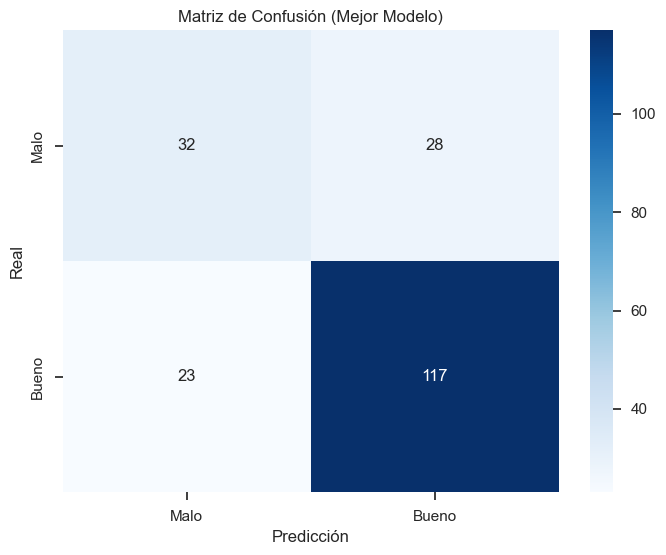

NameError: name 'y_pred_best' is not defined

In [ ]:

print("üìâ Matriz de confusi√≥n:")
cm = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = ['Malo', 'Bueno'], yticklabels=['Malo', 'Bueno'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n (Mejor Modelo)')
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best_).ravel()
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")
print(f"Falsos negativos (FN): {fn}")
print(f"Verdaderos positivos (TP): {tp}")


##### **An√°lisis de errores: ¬øCu√°l es m√°s costoso para el banco?**
Dado que el objetivo de la instituci√≥n financiera es maximizar la cantidad de pr√©stamos que efectivamente se pagan, es clave analizar el tipo de error que genera mayor impacto negativo.

En este contexto, existen dos errores posibles:

- Falso Positivo (FP): El modelo predice que el cliente pagar√° el pr√©stamo, pero en realidad no lo hace.
Este error implica una p√©rdida directa para el banco, ya que otorga un pr√©stamo que probablemente no se recupere.

- Falso Negativo (FN): El modelo predice que el cliente no pagar√°, pero en realidad s√≠ lo har√≠a.
Este error implica una p√©rdida de oportunidad, ya que el banco deja de ganar intereses por un pr√©stamo que habr√≠a sido exitoso.

‚úÖ Conclusi√≥n:
El error m√°s costoso para el banco es el Falso Positivo, porque representa una p√©rdida financiera concreta, mientras que el Falso Negativo representa una oportunidad perdida, pero sin impacto directo en las finanzas.

¬øQu√© m√©trica priorizar?
Dado este an√°lisis, no deber√≠amos enfocarnos √∫nicamente en *accuracy*, ya que esa m√©trica puede estar sesgada si hay una clase mayoritaria (como suele pasar en este tipo de datasets).

En cambio, es recomendable:

‚úÖ Priorizar la precisi√≥n (precision) de la clase positiva (pagadores): para asegurarnos de que los aprobados sean efectivamente buenos pagadores.

‚úÖ O alternativamente, el recall de la clase negativa (morosos): para asegurarnos de atrapar la mayor cantidad posible de personas que no pagar√≠an.

Esto depende tambi√©n de los objetivos estrat√©gicos del banco (ej. ser m√°s inclusivo vs. ser m√°s conservador), pero en t√©rminos de p√©rdidas, la precisi√≥n es clave.

### **3. Evaluaci√≥n de equidad del modelo inicial**


Cuando un banco utiliza un modelo autom√°tico para predecir si una persona es ‚Äúbuena‚Äù o ‚Äúmala‚Äù pagadora (es decir, si se le otorgar√° o no un cr√©dito), es clave asegurarse de que el modelo no discrimine injustamente por variables como g√©nero, edad, nacionalidad, etc.

A continuaci√≥n se describen los principales criterios de fairness, con foco en g√©nero como variable sensible (ej.: hombre vs. mujer), en este contexto:

üîπ**1. Statistical Parity**

Definci√≥n aplicada: significa que la proporci√≥n de personas que reciben un pr√©stamo (predicci√≥n = ‚Äúbueno‚Äù) sea igual entre g√©neros.
üìå Ejemplo:
- Si el 70% de los hombres reciben un pr√©stamo, entonces tambi√©n el 70% de las mujeres deber√≠an recibirlo, sin importar si en realidad pagar√°n o no.
‚ö†Ô∏è Cr√≠tica: Puede dar lugar a injusticias si un grupo tiene en promedio menos capacidad de pago, ya que se exige tratar igual a todos sin considerar el verdadero comportamiento crediticio.

üîπ **2. Equalized Odds**


Definici√≥n aplicada: Que el modelo cometa los mismos errores para todos los g√©neros, tanto Falsos Positivos (FP) como Falsos Negativos (FN).

üìå Ejemplo:
- La tasa de rechazos incorrectos (FN) entre mujeres debe ser igual que entre hombres.
- Y tambi√©n la tasa de aprobaciones incorrectas (FP) debe ser igual entre g√©neros.

‚úÖ Es un criterio m√°s fuerte: no s√≥lo se busca igualdad en el acceso, sino tambi√©n igualdad en el tratamiento ante errores.

üîπ **3. Equal Opportunity**

Definici√≥n aplicad: caso particular de Equalized Odds que s√≥lo exige igualdad en los Falsos Negativos.
üìå Ejemplo:
- Que la tasa de personas que s√≠ iban a pagar pero fueron rechazadas por el modelo (FN) sea igual entre hombres y mujeres.

Es relevante si se quiere evitar dejar afuera injustamente a personas que s√≠ deber√≠an recibir el pr√©stamo, lo que podr√≠a generar un sesgo estructural de exclusi√≥n.

üîπ **4. Predictive Parity**

Definici√≥n aplicada: que la precisi√≥n de las predicciones positivas (los que reciben el pr√©stamo) sea igual entre g√©neros.
üìå Ejemplo:
Si el modelo predice que una persona va a pagar, la proporci√≥n real de personas que efectivamente lo hacen (precision) debe ser igual entre hombres y mujeres.

‚úÖ Es √∫til para ver si las decisiones positivas del modelo tienen igual valor confiable sin importar el grupo.

--------------------------------------------

b. Objetivo: Ver si hay disparidad entre grupos (por ejemplo, entre g√©neros) en las m√©tricas asociadas a cada tipo de fairness.

‚úÖ Supuestos:
- Variable sensible: gender (ej. masculino/femenino)
- 1 ‚Üí bueno (persona que pagar√° el cr√©dito)
- 0 ‚Üí malo (persona que no pagar√°)
- y_true: etiquetas verdaderas
- y_pred: predicciones del modelo
- grupo_A = Hombres
- grupo_B = Mujeres
- Umbral de tolerancia de disparidad: 0.1 (10%) ‚Üí si la diferencia entre m√©tricas > 0.1, consideramos que hay injusticia/falta de equidad

In [28]:
y_pred 

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [29]:
X.columns

Index(['cuenta_corriente', 'duracion_credito_meses', 'monto_credito',
       'cuenta_ahorros', 'antiguedad_empleo', 'tasa_cuota_ingreso',
       'residencia_actual_anios', 'edad', 'cantidad_creditos_existentes',
       'personas_a_cargo',
       'historial_crediticio_cuenta cr√≠tica / otros cr√©ditos',
       'historial_crediticio_retraso en el pago',
       'historial_crediticio_sin cr√©ditos / todos pagados',
       'historial_crediticio_todos los cr√©ditos en este banco pagados',
       'proposito_credito_coche (usado)', 'proposito_credito_educaci√≥n',
       'proposito_credito_electrodom√©sticos',
       'proposito_credito_muebles/equipos', 'proposito_credito_negocios',
       'proposito_credito_otros', 'proposito_credito_radio/televisi√≥n',
       'proposito_credito_reentrenamiento', 'proposito_credito_reparaciones',
       'estado_civil_genero_hombre: divorciado/separado',
       'estado_civil_genero_hombre: soltero',
       'estado_civil_genero_mujer: divorciada/separada/casada'

In [30]:
X_test.index

Index([977, 735, 615, 413, 563,  27, 514, 624, 475, 991,
       ...
       383,  25, 297, 630, 798, 138, 442, 153, 325, 738],
      dtype='int64', length=200)

In [31]:
gender_test = df.loc[X_test.index, 'genero']

In [32]:
df.to_excel('german_credit_data.xlsx', index=False)

In [33]:
gender_test

977    masculino
735     femenino
615    masculino
413    masculino
563    masculino
         ...    
138    masculino
442    masculino
153     femenino
325    masculino
738    masculino
Name: genero, Length: 200, dtype: object

#### **Statistical Parity**
¬øQu√© medimos?
Proporci√≥n de personas a las que el modelo les predice que pagar√°n (positivos) en cada grupo.

F√≥rmula:

**SP = ùëÉ(≈∂ = 1 ‚à£ grupo )**

In [34]:
sp_hombres = (y_pred_best[gender_test == 'masculino'] == 1).mean()
sp_mujeres = (y_pred_best[gender_test == 'femenino'] == 1).mean()
disparidad_sp = abs(sp_hombres - sp_mujeres)

si_o_no = disparidad_sp < 0.1


print(f"SP en hombres: {sp_hombres:.3f}")
print(f"SP en mujeres: {sp_mujeres:.3f}")
print(f'--' * 20)
print(f"Disparidad de SP: {disparidad_sp:.3f}")
print(f"¬øDisparidad aceptable? {'S√≠' if si_o_no else 'No'}")

SP en hombres: 0.657
SP en mujeres: 0.533
----------------------------------------
Disparidad de SP: 0.124
¬øDisparidad aceptable? No


#### **Equalized Odds**
¬øQu√© medimos?
Tanto el TPR como el FPR deben ser iguales entre grupos.
‚ö†Ô∏è En este caso, se considera la mayor disparidad entre TPR y FPR.

F√≥rmula:

- **TPR = ùëÉ(≈∂ = 1 ‚à£Y = 1, grupo)**
- **FPR = ùëÉ(≈∂ = 1 ‚à£Y = 0, grupo)**

In [35]:
# True Positive Rate
tpr_m = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'masculino')).sum() / ((y_test == 1) & (gender_test == 'masculino')).sum()
tpr_f = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'femenino')).sum() / ((y_test == 1) & (gender_test == 'femenino')).sum()

# False Positive Rate
fpr_m = ((y_pred_best == 1) & (y_test == 0) & (gender_test == 'masculino')).sum() / ((y_test == 0) & (gender_test == 'masculino')).sum()
fpr_f = ((y_pred_best == 1) & (y_test == 0) & (gender_test == 'femenino')).sum() / ((y_test == 0) & (gender_test == 'femenino')).sum()

disparidad_equalized_odds = max(abs(tpr_m - tpr_f), abs(fpr_m - fpr_f))

print(f'TPR en hombres: {tpr_m:.3f}')
print(f'TPR en mujeres: {tpr_f:.3f}')
print(f'--'*50)
print(f'FPR en hombres: {fpr_m:.3f}')
print(f'FPR en mujeres: {fpr_f:.3f}')
print(f'--'*50)
print(f"Disparidad de Equalized Odds: {disparidad_equalized_odds:.3f}")
print(f"¬øDisparidad aceptable? {'S√≠' if disparidad_equalized_odds < 0.1 else 'No'}")


TPR en hombres: 0.770
TPR en mujeres: 0.625
----------------------------------------------------------------------------------------------------
FPR en hombres: 0.375
FPR en mujeres: 0.350
----------------------------------------------------------------------------------------------------
Disparidad de Equalized Odds: 0.145
¬øDisparidad aceptable? No


#### **Equal Opportunity**
¬øQu√© medimos?
Recall (TPR) para la clase positiva (personas que s√≠ iban a pagar), por grupo.

F√≥rmula:

**TPR = ùëÉ(≈∂ = 1 ‚à£Y = 1, grupo)**

In [36]:
# Tasa de verdaderos positivos entre quienes efectivamente iban a pagar
eo_hombres = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'masculino')).sum() / ((y_test == 1) & (gender_test == 'masculino')).sum()    
eo_mujeres = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'femenino')).sum() / ((y_test == 1) & (gender_test == 'femenino')).sum()


disparidad_eo = abs(eo_hombres - eo_mujeres)

print(f'Tasa de verdaderos positivos (EO) hombres: {eo_hombres:.3f}')
print(f'Tasa de verdaderos positivos (EO) mujeres: {eo_mujeres:.3f}')
print(f'--'*50)

si_o_no = disparidad_eo < 0.1
print(f"Disparidad de EO: {disparidad_eo:.3f}")
print(f"¬øDisparidad aceptable? {'S√≠' if si_o_no else 'No'}")

Tasa de verdaderos positivos (EO) hombres: 0.770
Tasa de verdaderos positivos (EO) mujeres: 0.625
----------------------------------------------------------------------------------------------------
Disparidad de EO: 0.145
¬øDisparidad aceptable? No


#### **Predictive Parity**
¬øQu√© medimos?
Precisi√≥n del modelo por grupo: entre los que predijo como positivos, ¬øcu√°ntos efectivamente lo eran?


F√≥rmula:

**PPV = ùëÉ( Y = 1 ‚à£ ≈∂ = 1, grupo)**

In [37]:
ppv_m = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'masculino')).sum() / ((y_pred_best == 1) & (gender_test == 'masculino')).sum()
ppv_f = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'femenino')).sum() / ((y_pred_best == 1) & (gender_test == 'femenino')).sum()
disparidad_ppv = abs(ppv_m - ppv_f)

print(f'Disparidad en PPV hombres: {ppv_m:.3f}')
print(f'Disparidad en PPV mujeres: {ppv_f:.3f}')
print(f'--'*30)

print(f"Disparidad de PPV: {disparidad_ppv:.3f}")
print(f"¬øDisparidad aceptable? {'S√≠' if disparidad_ppv < 0.1 else 'No'}")

Disparidad en PPV hombres: 0.837
Disparidad en PPV mujeres: 0.781
------------------------------------------------------------
Disparidad de PPV: 0.056
¬øDisparidad aceptable? S√≠


#### Recordando que forman parte del equipo del banco, cual de los criterios de fairness le parece relevante en este contexto. Justificar su elecci√≥n.

En el contexto de un banco que otorga cr√©ditos, el objetivo principal es maximizar la aprobaci√≥n de personas que efectivamente pagar√°n el pr√©stamo, pero, muy especialmente, minimizar la concesi√≥n de cr√©ditos a personas que no pagar√°n (falsos positivos). Esto se traduce en la necesidad de controlar tanto la tasa de verdaderos positivos (TPR) como la tasa de falsos positivos (FPR).

Por ello, el criterio de fairness m√°s relevante es Equalized Odds, ya que exige que ambos grupos protegidos (por ejemplo, mujeres y hombres) tengan tasas similares tanto de verdaderos positivos como de falsos positivos. Esto garantiza que el banco no incurra en un sesgo que afecte desproporcionadamente a un grupo, ya sea otorg√°ndoles indebidamente cr√©ditos riesgosos o neg√°ndolos injustamente.

De esta forma, se protege el inter√©s financiero de la instituci√≥n y se asegura una equidad real en la evaluaci√≥n crediticia, evitando p√©rdidas innecesarias y discriminaci√≥n indirecta. Otros criterios, como Statistical Parity, podr√≠an ignorar el costo real de los errores y no garantizar√≠an esta protecci√≥n econ√≥mica ni equitativa.